# Annotations for the Sirajology Python NN Example

Инспирировано https://m.habr.com/ru/company/wunderfund/blog/314242/

Потребуются `pip install tensorflow keras`

In [1]:
import os
import numpy as np
from keras.models import Model
from keras.layers import Dense, Input
from keras.utils import np_utils

Using TensorFlow backend.


The following code creates the input matrix. Although not mentioned in the video, the third column is for accommodating the bias term and is not part of the input. 

In [16]:
#input data

np.random.seed(1912016)
X = np.random.random((150, 2)) * 4.0 - 2.0

X = []
for i in range(-40, 40):
    for j in range(-40, 40):
        X.append([i * 0.05, j * 0.05])
X = np.array(X)

a = 1.4

Y = [
    1 if (a*(x-1.4) + (x-1.4)**2 + y**2)**2 <= a**2 * ((x-1.4)**2 + y**2) else 0
    for [x, y] in X
]

In [17]:
l0 = Input(shape=(2,))
l1 = Dense(32, activation='sigmoid', use_bias=True)(l0)
l2 = Dense(16, activation='sigmoid', use_bias=True)(l1)
l3 = Dense(8, activation='sigmoid', use_bias=True)(l2)
l4 = Dense(1, activation='sigmoid', use_bias=False)(l3)

model = Model(input=l0, output=l4)

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['accuracy']
)

c:\users\вера\desktop\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  import sys


This is the main training loop. The output shows the evolution of the error between the model and desired. The error steadily decreases. 

In [21]:
if os.path.isfile("model_4.h5"):
    model.load_weights("model_4.h5")
else:
    model.fit(
        X, Y,
        epochs=2000,
        verbose=False
    )
    model.save("model_4.h5")

Ну и теперь посмотрим, как оно научилось ограничивать что-то (возможно, это сердечко, но оно лежит и это неточно)...

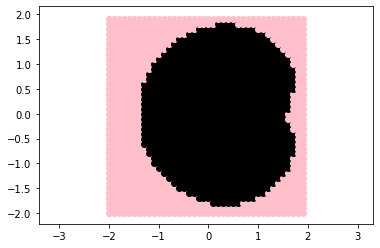

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.axis('equal')

c = np.r_[-2:2:0.1]

# https://stackoverflow.com/a/11144716/539470 =)
XY = np.transpose([np.tile(c, len(c)), np.repeat(c, len(c))])

Z = model.predict(XY)

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, c='black' if z[0] >= 0.5 else 'pink')

plt.show()

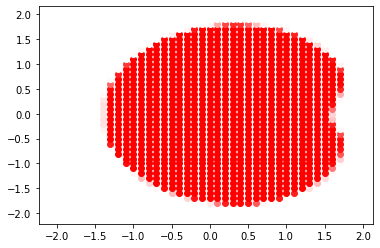

In [20]:
def saturate(v):
    return min(1, max(0, v))

for (x, y), z in zip(XY, Z):
    plt.scatter(x, y, color=[(1, 1-saturate(z[0]), 1-saturate(z[0]))])

plt.show()